In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [6]:
df = pd.read_csv("output.csv")

(74818, 6)

In [7]:
df.shape

(74818, 6)

In [8]:
df.head()

,id,datetime,name,price,quantity,total
0,1,2019-08-03 20:25:00,Plain Papadum,0.80,2,1.60
1,1,2019-08-03 20:25:00,King Prawn Balti,12.95,1,12.95
2,1,2019-08-03 20:25:00,Garlic Naan,2.95,1,2.95
3,1,2019-08-03 20:25:00,Mushroom Rice,3.95,1,3.95
4,1,2019-08-03 20:25:00,Paneer Tikka Masala,8.95,1,8.95


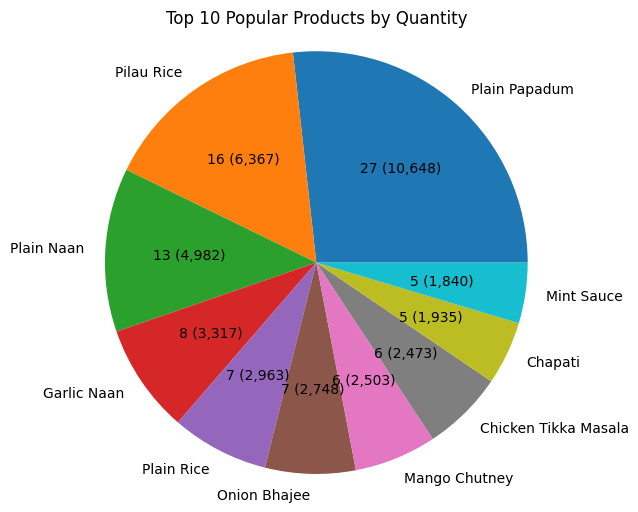

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

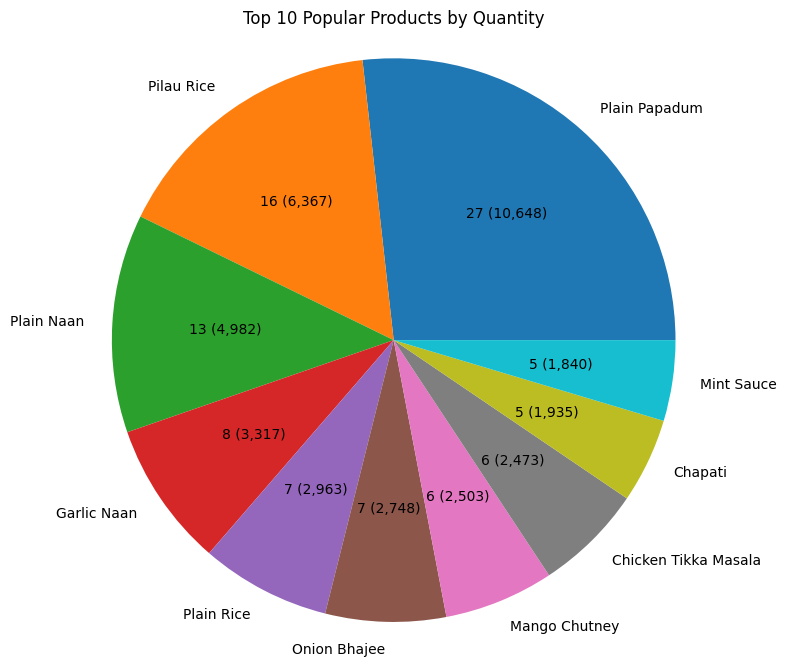

In [37]:
grouped = df.groupby('name')['quantity'].sum().reset_index()
top_10 = grouped.nlargest(10, 'quantity')

plt.figure(figsize=(8, 8))
plt.pie(top_10['quantity'], labels=top_10['name'], autopct=lambda pct: f"{pct:.0f}" + " (" + f"{int(pct * sum(top_10['quantity']) / 100):,}" + ")")
plt.title('Top 10 Popular Products by Quantity')
plt.axis('equal')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

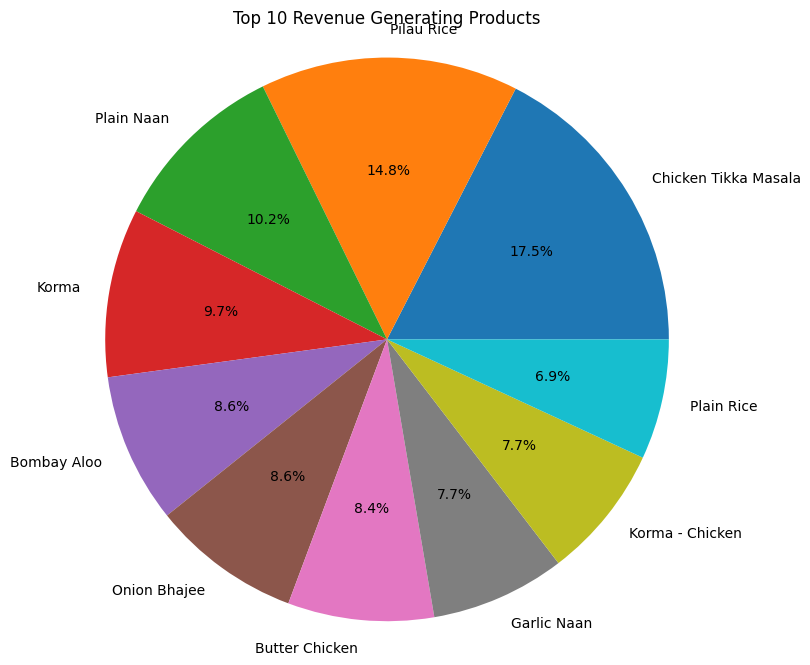

In [35]:
grouped = df.groupby('name')['total'].sum().reset_index()
top_10 = grouped.nlargest(10, 'total')
top_10['percentage'] = (top_10['total'] / top_10['total'].sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(top_10['total'], labels=top_10['name'], autopct='%1.1f%%')
plt.title('Top 10 Revenue Generating Products')
plt.axis('equal')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

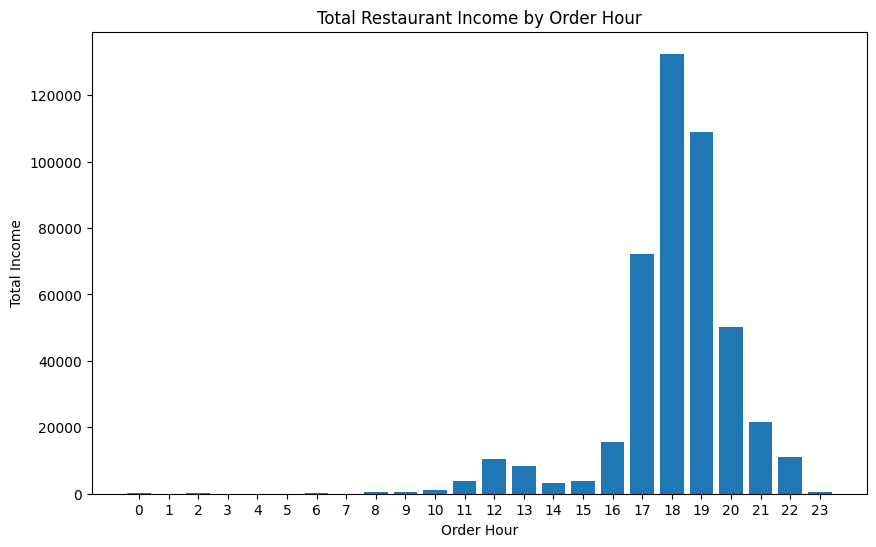

In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

grouped = df.groupby('hour')['total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped['hour'], grouped['total'])
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Order Hour')
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

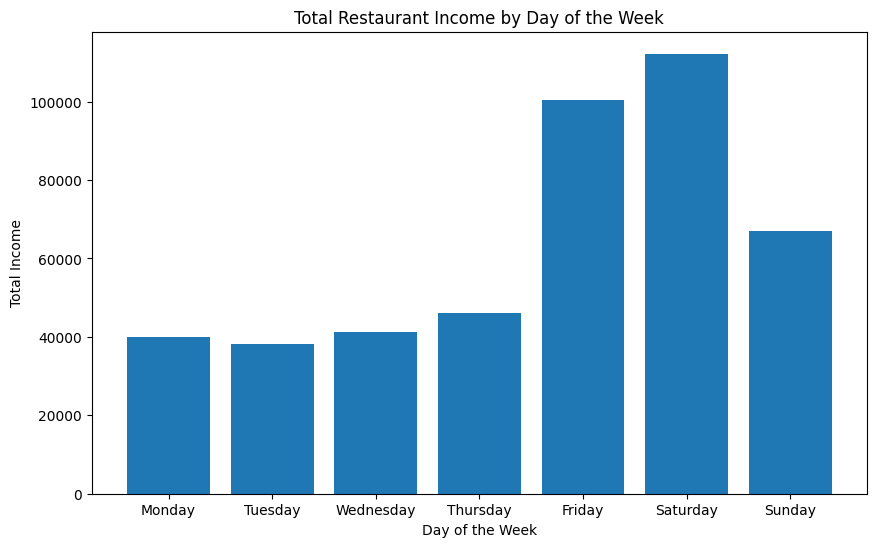

In [52]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['day_of_week'] = df['datetime'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].map(lambda x: day_names[x])

grouped = df.groupby('day_name')['total'].sum().reset_index()

grouped['day_name'] = pd.Categorical(grouped['day_name'], categories=day_names, ordered=True)

grouped.sort_values('day_name', inplace=True)

grouped.set_index('day_name', inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['total'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Day of the Week')
plt.show()